In [69]:
# Kullanacağımız kütüphaneleri tanıtarak başlıyoruz.

# Bot için kullandığım kütüphaneler
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys

# Dinamik olmasını istemem sebebiyle güncel tarihi alabilmem için gereken kütüphane
import datetime 

# Metin analizi için gereken kütüphaneler
from collections import Counter
from string import punctuation, digits
from wordcloud import WordCloud # Görselleştirme
import matplotlib.pyplot as plt # Görselleştirme

# Çıktı alma işlemi için kullandığım kütüphaneler
import numpy as np
from PIL import Image

In [70]:
# Kullanmak üzere günümüzü alıyoruz.
aylar= {
    1:"Ocak",
    2:"Şubat",
    3:"Mart",
    4:"Nisan",
    5:"Mayıs",
    6:"Haziran",
    7:"Temmuz",
    8:"Ağustos",
    9:"Eylül",
    10:"Ekim",
    11:"Kasım",
    12:"Aralık"
}
bugun = datetime.datetime.now()

In [71]:
def getThisYearHeaders(year):
    '''
        Bu fonksiyon ile parametre olarak verilen yılda bugün gündem olan başlıkları çekiyoruz.
    '''
    
    # Botun gideceği adresi tanıtıyoruz.
    url = "https://eksisozluk.com/basliklar/m/tarihte-bugun?year=" + year

    #  Bot için bir sekme açıyoruz.
    driver = webdriver.Chrome()
    driver.implicitly_wait(10)
    driver.get(url)

    headers = ""
    # Gidilen adresteki başlıkların genel olarak içinde bulunduğu adresi xpath olarak veriyoruz.
    select_element = driver.find_elements_by_xpath('//*[@id="mobile-index"]/ul/li')
    
    # Ardından bu adreste bulunan her bir başlığı bir stringe alıyoruz.
    for option in select_element:
        headers= headers + " " + (option.find_element_by_xpath('a').text)

    cevirici = str.maketrans('', '', punctuation) # Noktalama işaretlerini kaldırıyoruz.
    headers = headers.translate(cevirici)
    cevirici = str.maketrans('', '', digits) # Numaralardan arındırıyoruz
    headers = headers.translate(cevirici)
    headers = headers.split() # Ardından içindeki her bir kelimeyi tek tek bir kelime olarak listeye alıyoruz.
    headers = purge_from_garbage(headers) # Gereksiz kelimelerden arındırıyoruz.
    return headers

def purge_from_garbage(values):
    output = []
    stop_words = ["ekşi","sözlük","mi","acaba","acep","adamakıllı","adeta","ait","altmýþ","altmış","altý","altı","ama","amma","anca","ancak","arada","artýk","aslında","aynen","ayrıca","az","açıkça","açıkçası","bana","bari","bazen","bazý","bazı","başkası","baţka","belki","ben","benden","beni","benim","beri","beriki","beþ","beş","beţ","bilcümle","bile","bin","binaen","binaenaleyh","bir","biraz","birazdan","birbiri","birden","birdenbire","biri","birice","birileri","birisi","birkaç","birkaçı","birkez","birlikte","birçok","birçoğu","birþey","birþeyi","birşey","birşeyi","birţey","bitevi","biteviye","bittabi","biz","bizatihi","bizce","bizcileyin","bizden","bize","bizi","bizim","bizimki","bizzat","boşuna","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","buracıkta","burada","buradan","burası","böyle","böylece","böylecene","böylelikle","böylemesine","böylesine","büsbütün","bütün","cuk","cümlesi","da","daha","dahi","dahil","dahilen","daima","dair","dayanarak","de","defa","dek","demin","demincek","deminden","denli","derakap","derhal","derken","deđil","değil","değin","diye","diđer","diğer","diğeri","doksan","dokuz","dolayı","dolayısıyla","doğru","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elbet","elbette","elli","emme","en","enikonu","epey","epeyce","epeyi","esasen","esnasında","etmesi","etraflı","etraflıca","etti","ettiği","ettiğini","evleviyetle","evvel","evvela","evvelce","evvelden","evvelemirde","evveli","eđer","eğer","fakat","filanca","gah","gayet","gayetle","gayri","gayrı","gelgelelim","gene","gerek","gerçi","geçende","geçenlerde","gibi","gibilerden","gibisinden","gine","göre","gırla","hakeza","halbuki","halen","halihazırda","haliyle","handiyse","hangi","hangisi","hani","hariç","hasebiyle","hasılı","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","hiçbiri","hoş","hulasaten","iken","iki","ila","ile","ilen","ilgili","ilk","illa","illaki","imdi","indinde","inen","insermi","ise","ister","itibaren","itibariyle","itibarıyla","iyi","iyice","iyicene","için","iş","işte","iţte","kadar","kaffesi","kah","kala","kanýmca","karşın","katrilyon","kaynak","kaçı","kelli","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keza","kezalik","keşke","keţke","ki","kim","kimden","kime","kimi","kimisi","kimse","kimsecik","kimsecikler","külliyen","kýrk","kýsaca","kırk","kısaca","lakin","leh","lütfen","maada","madem","mademki","mamafih","mebni","međer","meğer","meğerki","meğerse","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","nasılsa","nazaran","naşi","ne","neden","nedeniyle","nedenle","nedense","nerde","nerden","nerdeyse","nere","nerede","nereden","neredeyse","neresi","nereye","netekim","neye","neyi","neyse","nice","nihayet","nihayetinde","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","oldukça","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","onca","onculayın","onda","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","oracık","oracıkta","orada","oradan","oranca","oranla","oraya","otuz","oysa","oysaki","pek","pekala","peki","pekçe","peyderpey","rağmen","sadece","sahi","sahiden","sana","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","sonradan","sonraları","sonunda","tabii","tam","tamam","tamamen","tamamıyla","tarafından","tek","trilyon","tüm","var","vardı","vasıtasıyla","ve","velev","velhasıl","velhasılıkelam","veya","veyahut","ya","yahut","yakinen","yakında","yakından","yakınlarda","yalnız","yalnızca","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yeniden","yenilerde","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yok","yoksa","yoluyla","yüz","yüzünden","zarfında","zaten","zati","zira","çabuk","çabukça","çeşitli","çok","çokları","çoklarınca","çokluk","çoklukla","çokça","çoğu","çoğun","çoğunca","çoğunlukla","çünkü","öbür","öbürkü","öbürü","önce","önceden","önceleri","öncelikle","öteki","ötekisi","öyle","öylece","öylelikle","öylemesine","öz","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şayet","şey","şeyden","şeyi","şeyler","şu","şuna","şuncacık","şunda","şundan","şunlar","şunları","şunu","şunun","şura","şuracık","şuracıkta","şurası","şöyle","ţayet","ţimdi","ţu","ţöyle"]
    for value in values:
        if value != (aylar[bugun.month]).lower() and value not in stop_words:
            output.append(value)
    return output

def getTodayHeaders():
    '''
        Bu fonksiyon ile kodun çalıştırıldığı sırada gündem olan başlıkları çekiyoruz.
    '''
    url = "https://eksisozluk.com"
    driver = webdriver.Chrome()
    driver.implicitly_wait(10)
    driver.get(url)

    headers = ""

    select_element = driver.find_elements_by_xpath('//*[@id="partial-index"]/ul/li')
    for option in select_element:
        try:
            headers= headers + " " + (option.find_element_by_xpath('a').text)
        except:
            continue

    cevirici = str.maketrans('', '', punctuation)
    headers = headers.translate(cevirici)
    cevirici = str.maketrans('', '', digits)
    headers = headers.translate(cevirici)
    headers = headers.split()
    headers = purge_from_garbage(headers)
    return headers

In [72]:
headers = getThisYearHeaders(str(bugun.year-10)) # 10 yıl önceki başlıkları çekiyoruz.
todayHeaders = getTodayHeaders() # Anlık gündem başlıklarını çekiyoruz.

In [73]:
# WordCloud için kullanacağımız listeyi döndürüyor. 
kelime_sayi = Counter(headers)
kelime_bugun_sayi = Counter(todayHeaders)
# Doğru mu gelmiş incelemek için burayı kullanıyorum.
print(type(kelime_sayi), '\n')

for kelime in kelime_sayi.most_common(10):
    print(kelime)
    
print("-------------")

for kelime in kelime_bugun_sayi.most_common(10):
    print(kelime)

<class 'collections.Counter'> 

('ismail', 3)
('maçı', 2)
('aids', 2)
('kız', 2)
('türüt', 2)
('kocaelispor', 1)
('fenerbahçe', 1)
('hastalığı', 1)
('dünyanın', 1)
('kısa', 1)
-------------
('ataşehirde', 1)
('öğrencileri', 1)
('ezen', 1)
('şoför', 1)
('üstteki', 1)
('yazarın', 1)
('nickinin', 1)
('düşündürdüğü', 1)
('schalke', 1)
('ün', 1)


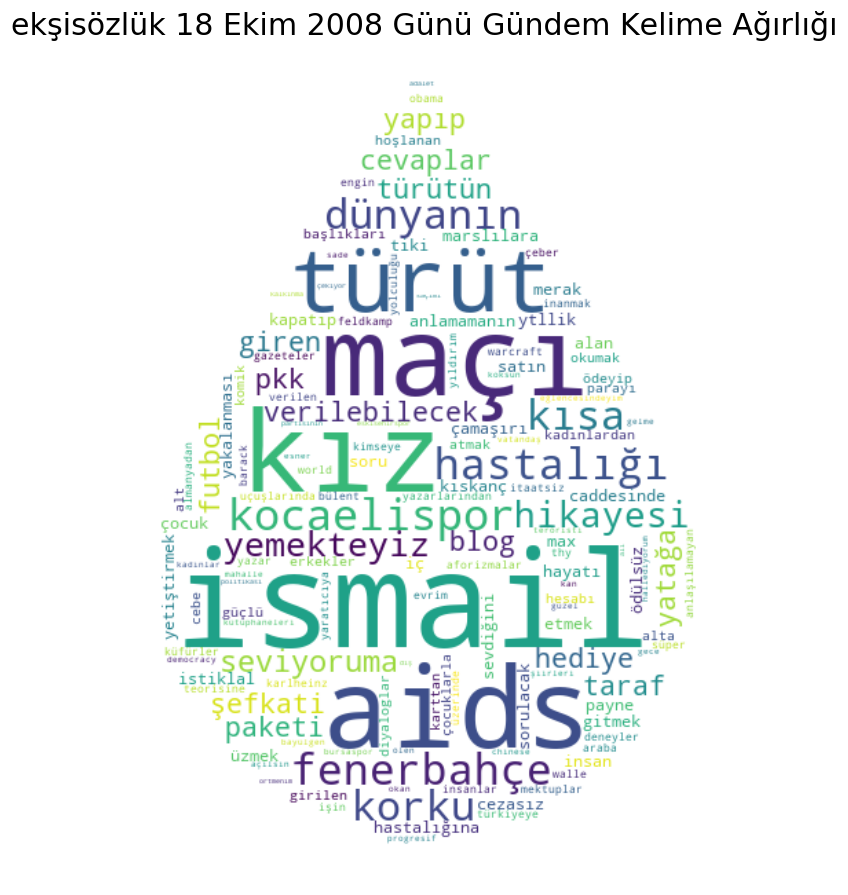

In [74]:
wave_mask = np.array(Image.open( "eksilogo.png")) # Kullanacağım maskeyi veriyorum.
wordcloud = WordCloud(width=3000,height=3000,background_color="white",mask=wave_mask).generate(' '.join(headers))    

plt.figure(figsize=(9,10), dpi=108)
plt.title("ekşisözlük "+ str(bugun.day) + " " + aylar[bugun.month] +" "+ str(bugun.year-10) +" Günü Gündem Kelime Ağırlığı", fontsize = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("eksi2008Gundem.jpeg", dpi = 108)
plt.show()


In [ ]:
wordcloud = WordCloud(width=3000,height=3000,background_color="white",mask=wave_mask).generate(' '.join(todayHeaders))    

plt.figure(figsize=(9,10), dpi=108)
plt.title("ekşisözlük "+ str(bugun.day) + " " + aylar[bugun.month] +" "+ str(bugun.year) +" Günü Gündem Kelime Ağırlığı", fontsize = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("eksiBugunGundem.jpeg", dpi = 108)
plt.show()

In [65]:
images_list = ['eksi2008Gundem.jpeg', 'eksiBugunGundem.jpeg']
imgs = [ Image.open(i) for i in images_list ]

In [66]:
min_img_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
img_merge = np.hstack( (np.asarray( i.resize(min_img_shape,Image.ANTIALIAS) ) for i in imgs ) )

In [67]:
img_merge = Image.fromarray( img_merge)
img_merge.save( 'eksicikti'+ str(bugun.day)+ aylar[bugun.month] + str(bugun.year-10) +'.jpg' )